In [31]:
import numpy as np  # Importing numpy for linear algebra operations
import pandas as pd  # Importing pandas for data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # Importing matplotlib for data visualization


In [32]:
# Load the dataset
train = pd.read_csv('train.csv')  # Loading the training dataset from a CSV file
test = pd.read_csv('test.csv')  # Loading the test dataset from a CSV file


In [33]:
train.head()  # Displaying the first few rows of the training dataset


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [34]:
train.info()  # Displaying information about the training dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [35]:
train.shape  # Displaying the shape of the training dataset (number of rows, number of columns)


(1460, 81)

In [36]:
train.isnull().sum()  # Checking for missing values in the training dataset and summing them up


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [37]:
test.shape  # Displaying the shape of the test dataset (number of rows, number of columns)


(1459, 80)

In [38]:
test.isnull().sum()  # Checking for missing values in the test dataset and summing them up


Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [39]:
def fill_missing_values(df):
    """
    Filling missing values in the DataFrame.

    Parameters:
    - df: DataFrame to fill missing values for.

    Returns:
    - None: The DataFrame is modified in place.
    """
    for column in df.columns:
        if df[column].dtype == np.float64:
            df[column].fillna(df[column].mean(), inplace=True)  # Filling missing values with the mean for float64 columns
        elif (df[column] == 'O').any():
            df[column].fillna(df[column].mode().iloc[0], inplace=True)  # Filling missing values with the mode for object (string) columns


In [40]:
fill_missing_values(train)  # Filling missing values in the training dataset using the defined function


In [41]:
train.isnull().sum()  # Checking for missing values in the training dataset after filling them


Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [42]:
fill_missing_values(test)  # Filling missing values in the test dataset using the defined function


In [43]:
from sklearn.preprocessing import LabelEncoder

def categorical_columns_encode(df):
    """
    Encode categorical columns using LabelEncoder and fill missing values for float64 columns with mean.

    Parameters:
    - df: DataFrame to encode categorical columns and fill missing values for float64 columns.

    Returns:
    - df: DataFrame with encoded categorical columns and filled missing values for float64 columns.
    """
    label_encoder = LabelEncoder()

    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = label_encoder.fit_transform(df[column])  # Encoding object (string) columns using LabelEncoder
        elif df[column].dtype == 'float64':
            df[column] = df[column].fillna(df[column].mean())  # Filling missing values with the mean for float64 columns

    return df


In [44]:
n = 0.3  # Percentage of null values threshold
print(f"List of all the columns with >{100*n}% of their rows as null : \n\n{train.columns[train.isnull().sum() > n*len(train)].values}")  # Printing the list of columns with more than n% null values


List of all the columns with >30.0% of their rows as null : 

['Alley' 'MasVnrType' 'FireplaceQu' 'PoolQC' 'Fence' 'MiscFeature']


In [45]:
import seaborn as sns

def numerical_plot(df, target='SalePrice'):
    """
    Generate histograms, boxplots, and scatterplots for numerical columns in the DataFrame.

    Parameters:
    - df: DataFrame containing numerical columns.
    - target: Name of the target variable for scatterplots.

    Returns:
    - None: Plots are displayed using Matplotlib and Seaborn.
    """
    cols = 3  # Number of columns for subplots
    num_cols = df.select_dtypes(include='number').iloc[:, 1:-1].columns  # Selecting numerical columns
    rows = len(num_cols)  # Number of rows for subplots

    figure, axs = plt.subplots(rows, cols, figsize=(20, rows*5))  # Creating subplots

    for i, col in enumerate(num_cols):
        sns.histplot(df[col], fill=True, kde=True, ax=axs[i, 0])  # Histogram
        sns.boxplot(df[col], ax=axs[i, 1])  # Boxplot
        sns.scatterplot(x=df[col], y=df[target], ax=axs[i, 2])  # Scatterplot
        axs[i, 0].set_title(f"Dist. of {col}; Skew:{round(df[col].skew(), 2)}; Null:{round(100*(df[col].isnull().sum()/len(df)), 2)}%")
        axs[i, 1].set_title(f"Boxplot of {col}")
        axs[i, 2].set_title(f"Scatterplot : {target} v. {col}")

    plt.tight_layout()
    plt.show()


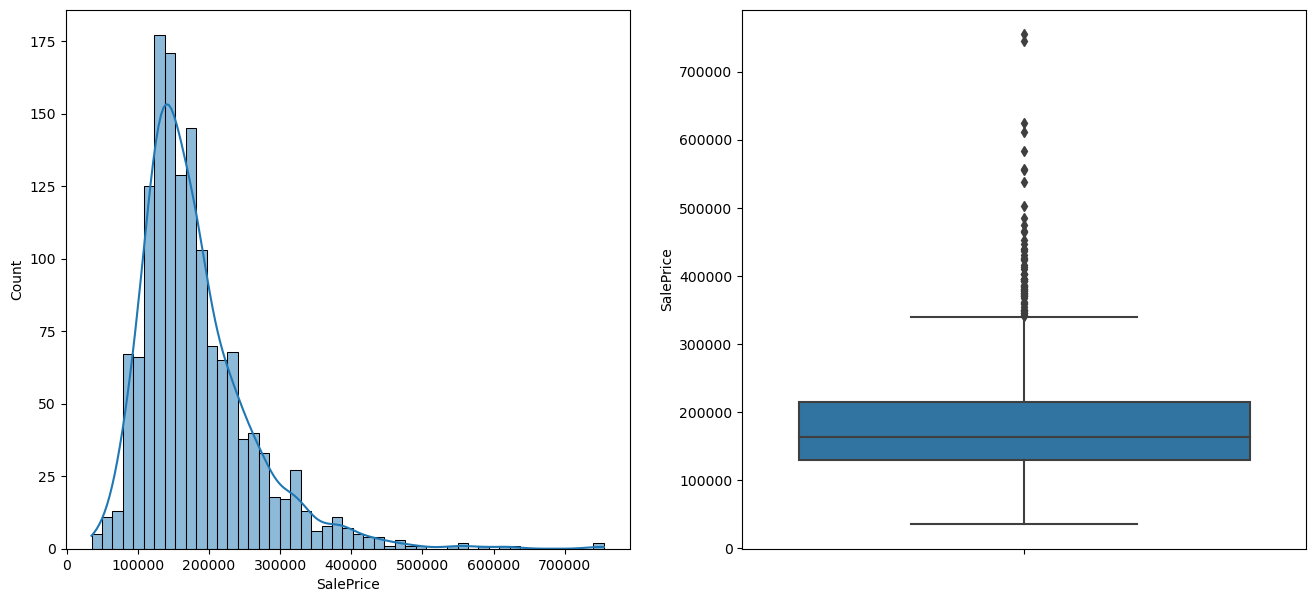

In [46]:
figure, axs = plt.subplots(1, 2, figsize=(16, 7))  # Creating subplots

# Histogram of SalePrice
sns.histplot(train['SalePrice'], fill=True, kde=True, ax=axs[0])

# Boxplot of SalePrice
sns.boxplot(data=train, y='SalePrice', ax=axs[1])

plt.show()  # Displaying the plots


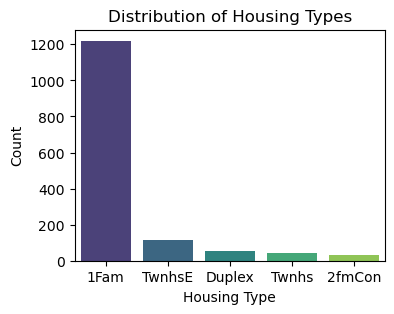

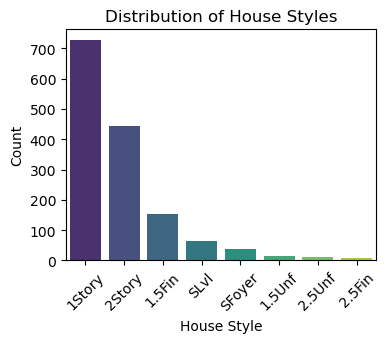

In [47]:
# Most Common Housing Types
plt.figure(figsize=(4,3))  # Setting the figure size
sns.countplot(x='BldgType', data=train, palette='viridis', order=train['BldgType'].value_counts().index)  # Creating countplot for housing types
plt.title('Distribution of Housing Types')  # Adding title
plt.xlabel('Housing Type')  # Adding x-axis label
plt.ylabel('Count')  # Adding y-axis label
plt.show()  # Displaying the plot

# Most Common House Styles
plt.figure(figsize=(4, 3))  # Setting the figure size
sns.countplot(x='HouseStyle', data=train, palette='viridis', order=train['HouseStyle'].value_counts().index)  # Creating countplot for house styles
plt.title('Distribution of House Styles')  # Adding title
plt.xlabel('House Style')  # Adding x-axis label
plt.ylabel('Count')  # Adding y-axis label
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.show()  # Displaying the plot


In [48]:
train = categorical_columns_encode(train)  # Encoding categorical columns and filling missing values in the training dataset
test = categorical_columns_encode(test)  # Encoding categorical columns and filling missing values in the test dataset


In [49]:
X = train.drop(['SalePrice','Id'], axis=1)  # Extracting features from the training dataset, excluding 'SalePrice' and 'Id'
y = train['SalePrice']  # Extracting the target variable from the training dataset
X_val = test.drop(['Id'],axis=1)  # Extracting features from the test dataset, excluding 'Id'


In [50]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  # Initializing StandardScaler object

X = sc.fit_transform(X)  # Scaling the features in the training dataset
X_val = sc.fit_transform(X_val)  # Scaling the features in the test dataset


In [51]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=43)


In [52]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import  accuracy_score

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

random_forest = RandomForestRegressor(random_state=0)  # Initializing Random Forest Regressor

# Defining the hyperparameter distributions for RandomizedSearchCV
distributions = {
    'n_estimators': randint(low=10, high=200),
    'max_depth': randint(low=1, high=20),
    'min_samples_split': randint(low=2, high=20),
    'min_samples_leaf': randint(low=1, high=20),
}

# Initializing RandomizedSearchCV
rf_search = RandomizedSearchCV(random_forest, distributions, random_state=0)

# Fitting the RandomizedSearchCV to the training data
rf_search.fit(X_train, y_train)


RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027D37E5AE90>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027D37E63390>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027D37E60A50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027D37E59FD0>},
                   random_state=0)

In [54]:
rf_search.best_params_  #it gives dictionary containing the best parameters found during the hyperparameter tuning process.

{'max_depth': 13,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 49}

In [55]:
best_params = rf_search.best_params_  # Storing the best parameters found by RandomizedSearchCV
best_rf_model = RandomForestRegressor(random_state=0, **best_params)  # Creating a RandomForestRegressor model with the best parameters
best_rf_model.fit(X_train, y_train)  # Fitting the RandomForestRegressor model to the training data
y_pred = best_rf_model.predict(X_test)  # Making predictions on the test set using the trained model


In [56]:
mse = mean_squared_error(y_test, y_pred)  # Calculating the mean squared error between the actual and predicted values
print(f"Mean Squared Error: {mse}")  # Printing the mean squared error


Mean Squared Error: 612785132.3163929


In [57]:
# RANDOM FOREST
rf = RandomForestRegressor()  # Initializing a Random Forest Regressor model
rf.fit(X_train, y_train)  # Fitting the model to the training data
y_pred = rf.predict(X_test)  # Making predictions on the test set


In [58]:
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))  # Calculating the root mean squared error
print(rms)  # Printing the root mean squared error
acc = rf.score(X_test, y_test)  # Calculating the accuracy score of the model on the test set
print(acc)  # Printing the accuracy score


25213.548283667864
0.905771101002716


In [59]:
# LINEAR REGRESSION
from sklearn.linear_model import LinearRegression

lr = LinearRegression()  # Initializing a Linear Regression model
lr.fit(X_train, y_train)  # Fitting the model to the training data
y_pred = lr.predict(X_test)  # Making predictions on the test set


In [60]:
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))  # Calculating the root mean squared error
print(rms)  # Printing the root mean squared error
acc = lr.score(X_test, y_test)  # Calculating the accuracy score of the model on the test set
print(acc)  # Printing the accuracy score


29641.398268029774
0.8697692462312318
